<a href="https://colab.research.google.com/github/maneeshtiw/HandWritten-Digit-Recongnition/blob/main/Handwritten_Digits_Recognition_py.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
mnist = tf.keras.datasets.mnist

In [ ]:
(x_train,y_train), (x_test,y_test) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [ ]:
x_train.shape
#y_train.shape

(60000, 28, 28)

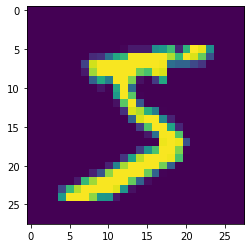

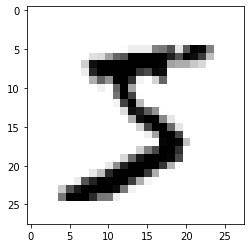

In [ ]:
#Check the graph how data look like.
plt.imshow(x_train[0])
plt.show()
# However we don't know whether its color image or binary images.
# so in order to plot it change the configuration
plt.imshow(x_train[0], cmap = plt.cm.binary)
plt.show()

In [ ]:
print(x_train[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18

In [ ]:
# you write have noticed that, they gray and all values varis from 0 to 255
# in order to normalize it

x_train = tf.keras.utils.normalize(x_train, axis=1)
x_test = tf.keras.utils.normalize(x_test, axis =1)

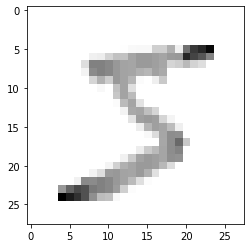

In [ ]:
plt.imshow(x_train[0], cmap =plt.cm.binary)
plt.show()

In [ ]:
# After normalizes
# you can see all values are row normalized.
print(x_train[0])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

In [ ]:
# just to check that we have labels inside our network
print(y_train[0])

5


In [ ]:
image_size = 28
# increasing one dimension for kernal operation
x_trainA = np.array(x_train).reshape(-1,image_size, image_size,1)
# increasing one dimension one for kernal operation
x_testA = np.array(x_test).reshape(-1,image_size, image_size,1)
print('Training Sample dimensin', x_trainA.shape)
print('Training Sample dimension', x_testA.shape)

Training Sample dimensin (60000, 28, 28, 1)
Training Sample dimension (10000, 28, 28, 1)


In [ ]:
# Training on 60,000 samples of mnist handwritten dataset

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Activation
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D





In [ ]:
# Creating a neural network
model = Sequential()

# first Convolution layer 0 1 2 3 (60000, 28, 28, 1)  28-3+1 26*26
#  First Convolution layer 0 1 2  3  (60000, 28, 28, 1)   28-3+1 = 26*26
# only for first convolution layer to mention input layer size
model.add(Conv2D(64, (3, 3), input_shape = x_trainA.shape[1:]))
# Now Activation function to make it non-linera, <0 , remove >0 allow move to second layer.
model.add(Activation('relu'))
# Now maxpooling Single max values of 2* 2,
model.add(MaxPooling2D(pool_size=(2,2)))


## 2nd Convolution layer 26-3+1 = 24*24
model.add (Conv2D(64,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))


### 3rd Convolution layers  24*24
model.add (Conv2D(64,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))


## fully connected layers # 1
# before using fully connected layer,need to be flatten so that 2D to 1D
model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))



## fully connected layers 2
model.add(Dense(32))
model.add(Activation('relu'))


## Last fully Convolution layer, output must be equal to number of classes , 10 (0-9)
# this last dense layer must be equeal to 10
model.add(Dense(10))
#Activation function is changed to softmax 
model.add(Activation('softmax'))


In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 64)        640       
_________________________________________________________________
activation (Activation)      (None, 26, 26, 64)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        36928     
_________________________________________________________________
activation_1 (Activation)    (None, 11, 11, 64)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 3, 64)          3

In [ ]:
print('Total Training Sample',len(x_trainA))

Total Training Sample 60000


In [ ]:
model.compile(loss= "sparse_categorical_crossentropy" , optimizer = "adam" , metrics = ["accuracy"] )

In [ ]:
# This is training model. 
hist = model.fit(x_trainA, y_train , epochs=5 , validation_split =0.3 )

Epoch 1/5
1313/1313 [==============================] - 37s 4ms/step - loss: 0.3282 - accuracy: 0.8956 - val_loss: 0.1263 - val_accuracy: 0.9601
Epoch 2/5
1313/1313 [==============================] - 5s 4ms/step - loss: 0.1033 - accuracy: 0.9684 - val_loss: 0.0892 - val_accuracy: 0.9716
Epoch 3/5
1313/1313 [==============================] - 5s 4ms/step - loss: 0.0725 - accuracy: 0.9777 - val_loss: 0.0700 - val_accuracy: 0.9782
Epoch 4/5
1313/1313 [==============================] - 5s 4ms/step - loss: 0.0572 - accuracy: 0.9821 - val_loss: 0.0727 - val_accuracy: 0.9783
Epoch 5/5
1313/1313 [==============================] - 5s 4ms/step - loss: 0.0475 - accuracy: 0.9848 - val_loss: 0.0762 - val_accuracy: 0.9783


In [ ]:
## Evaluateing on testing data set MNIST
test_loss, test_acc = model.evaluate(x_testA, y_test)
print('The Loss on 10,000 test sample', test_loss)
print('Validation Accuracy on 10,000 test sample', test_acc) 

313/313 [==============================] - 1s 2ms/step - loss: 0.0701 - accuracy: 0.9797
The Loss on 10,000 test sample 0.07006692886352539
Validation Accuracy on 10,000 test sample 0.9797000288963318


In [ ]:
predicions = model.predict([x_testA])

In [ ]:
print(predicions)

[[1.1798548e-08 5.8592182e-08 1.6244028e-06 ... 9.9999583e-01
  3.8411915e-08 6.6952833e-07]
 [1.1952727e-05 6.0187402e-09 9.9998736e-01 ... 2.2487097e-08
  1.1667583e-07 8.4217272e-10]
 [1.1299020e-06 9.9998629e-01 1.9601589e-06 ... 1.1978761e-06
  3.0752608e-06 2.3109919e-07]
 ...
 [4.1056389e-09 1.3326237e-09 7.8201357e-09 ... 2.5186136e-08
  1.5720493e-06 3.1802817e-06]
 [4.0883515e-06 9.6335867e-08 4.4131188e-08 ... 2.5963534e-08
  5.3217576e-05 1.2849879e-06]
 [1.0380512e-03 9.8205855e-05 4.4655590e-03 ... 7.0400543e-09
  3.2340104e-05 6.1252380e-05]]


In [ ]:
print(np.argmax(predicions[0]))

7


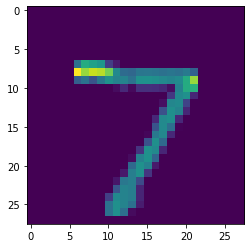

In [ ]:
plt.imshow(x_test[0])

In [ ]:
print(np.argmax(predicions[128]))

8


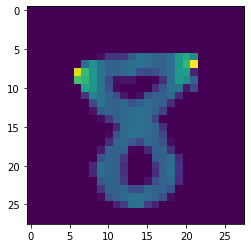

In [ ]:
plt.imshow(x_test[128])

In [ ]:
print(np.argmax(predicions[50]))

6


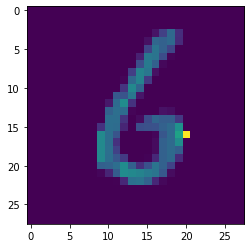

In [ ]:
plt.imshow(x_test[50])

In [ ]:
print(np.argmax(predicions[9]))

9


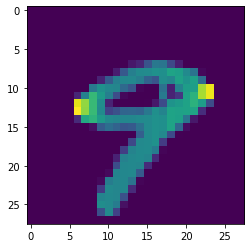

In [ ]:
plt.imshow(x_test[9])